In [97]:
# Importing our modules
import os
import random
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import warnings
warnings.filterwarnings('ignore')

In [98]:
train_dir = 'Train' # specifying our data train directory
train_categories = os.listdir(train_dir) # loading our train categories
train_categories.sort() # sorting the categories to ensure order
train_categories

['Bears', 'Pandas']

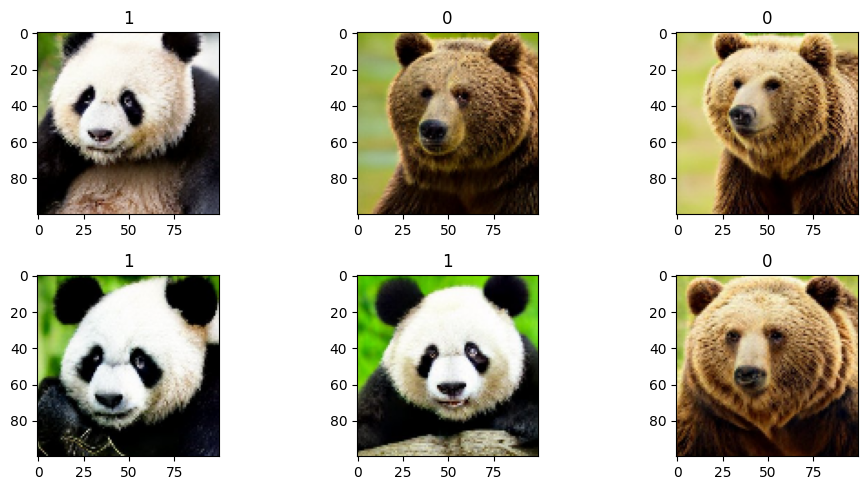

In [99]:
# visualizing our images

image_visuals = []

for category in train_categories:
    path = os.path.join(train_dir, category)
    class_num = train_categories.index(category)
    for image in os.listdir(path)[:3]:
        img = cv.imread(os.path.join(path, image))
        img = cv.resize(img, (100, 100))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        image_visuals.append([img, class_num])


random.shuffle(image_visuals)

fig, axes = plt.subplots(2, 3, figsize = (10, 5))
axes = axes.ravel()


for i, (img, num) in enumerate(image_visuals):
    axes[i].imshow(img)
    axes[i].set_title(num)
    # axes[i].axis('off')


plt.tight_layout()
plt.show()

In [100]:
train_data = []


def load_train():
    for category in train_categories:
        path = os.path.join(train_dir, category)
        class_num = train_categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (100, 100))
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            train_data.append([img, class_num])

In [101]:
load_train()

print("Found {} images from {} categories".format(len(train_data), len(train_categories)))

Found 500 images from 2 categories


In [102]:
random.shuffle(train_data)

In [103]:
X = []
y = []

for data in train_data:
    X.append(data[0])
    y.append(data[1])

In [104]:
X_train = np.array(X)/255
y_train = np.array(y)

In [105]:
test_dir = 'Test'
test_categories = os.listdir(test_dir)
test_categories.sort()
test_categories

['Bears', 'Pandas']

In [106]:
test_data = []


def load_test():
    for category in test_categories:
        path = os.path.join(test_dir, category)
        class_num = test_categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (100, 100))
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            test_data.append([img, class_num])

In [107]:
load_test()


print("Found {} images from {} categories".format(len(test_data), len(test_categories)))

Found 100 images from 2 categories


In [108]:
random.shuffle(test_data)

In [109]:
X = []
y = []


for data in test_data:
    X.append(data[0])
    y.append(data[1])

In [110]:
X_test = np.array(X)/255
y_test = np.array(y)

In [111]:
X_train.shape, y_train.shape

((500, 100, 100, 3), (500,))

In [112]:
X_test.shape, y_test.shape

((100, 100, 100, 3), (100,))

In [113]:
model = Sequential(
    [
        Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),

        Dense(128, activation='relu'),
        Dense(2, activation='softmax'),
    ]
)

In [114]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [115]:
hist = model.fit(X_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.7907 - loss: 0.4375
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9986 - loss: 0.0152
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9922 - loss: 0.0151


In [116]:
model.evaluate(X_train, y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0031


[0.0031828517094254494, 1.0]

In [117]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0029  


[0.0038394182920455933, 1.0]

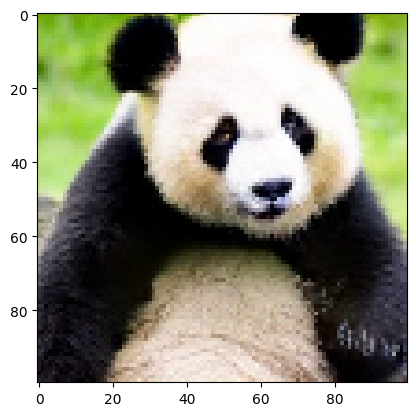

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


'Pandas'

In [118]:
plt.imshow(X_test[3])
plt.show()


pred = model.predict(np.expand_dims(X_test[3], axis=0))
pred = np.argmax(pred)
train_categories[pred]

In [119]:
predictions = []

for x in X_test:
    preds = model.predict(np.expand_dims(x, axis=0))
    predictions.append(np.argmax(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

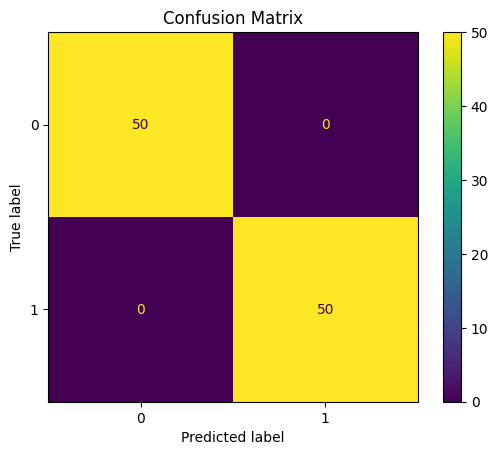

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()